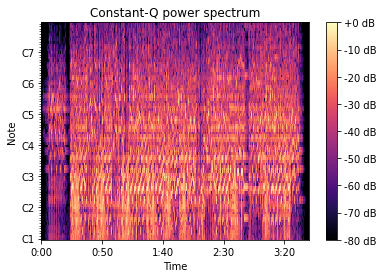

In [152]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

y1, sr = librosa.load("/content/drive/Shareddrives/G-33-2022/Audios/Fully mixed song for us to separate and listen/Akeboshi - Wind.wav")
#y2, sr = librosa.load("/content/drive/Shareddrives/G-33-2022/Audios/To do/57 Robbie Williams & Kylie Minogue - Kids/song.ogg")

y=y1#[1:5346243]+y2[1:5346243]

C = np.abs(librosa.cqt(y, sr=sr))

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [153]:
print(y.shape)
print(C.shape)

(4864230,)
(84, 9501)


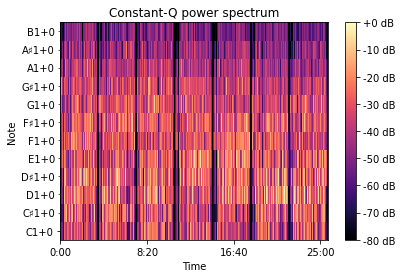

In [154]:

array =np.reshape(C[:],(12,-1) )
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db((array), ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
#print(C[-1][maxind])
#print(maxind.shape)
#print(array.shape)
#print(max(array[1]))
#print(max(maxind))

In [155]:
print(C[:,0].shape)
print(np.reshape(C[:,0],(12,-1) ).shape)
print(array.shape)

#print(img.shape)

(84,)
(12, 7)
(12, 66507)


In [156]:
Qtrans=[]

for i in range( len(C[0,:]) ):
  Qtrans.append(sum(np.reshape(C[:,i],(-1,12) ) ) )
  
Qtrans = np.array(Qtrans)
print(Qtrans.shape)
 

(9501, 12)


In [157]:
Time_window_scale = Qtrans[1000]
index = np.linspace(1,12,12)
D = np.stack((index,Time_window_scale),1)

D = D[D[:,1].argsort()]
Time_window_notes = D[1:12,0]
Time_window_chords = Time_window_notes[-3:]
print(D)
print(Time_window_chords)
#print(array.shape)

[[10.          0.06007909]
 [ 5.          0.0668675 ]
 [12.          0.06985129]
 [ 7.          0.07494651]
 [ 6.          0.08335398]
 [ 4.          0.08764381]
 [ 2.          0.09022791]
 [ 3.          0.09307607]
 [ 8.          0.09425943]
 [ 9.          0.09566879]
 [ 1.          0.10403991]
 [11.          0.10465337]]
[ 9.  1. 11.]


In [158]:
index = np.linspace(1,12,12)
chordList =[]
for i in range (len(Qtrans)):
  Time_window_scale = Qtrans[i]
  D = np.stack((index,Time_window_scale),1)
  D = D[D[:,1].argsort()]
  Time_window_notes = D[1:12,0]
  Time_window_chords = Time_window_notes[-3:]
  chordList.append(Time_window_chords)
  #print(Time_window_chords)


chordList=np.array(chordList)

print(chordList.shape)

(9501, 3)


In [184]:
def CommonNotes(chord1,chord2):
   a_set = set(chord1)
   b_set = set(chord2)
   common_count =len(a_set & b_set)
   if (common_count==3):
      return 0
   else:
      return 1

In [185]:
signal=[]
for i in range (len(chordList)-1):
  change = CommonNotes(chordList[i],chordList[i+1])
  signal.insert(i, change )


[1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 

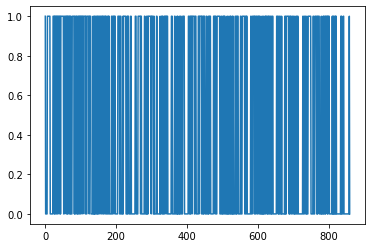

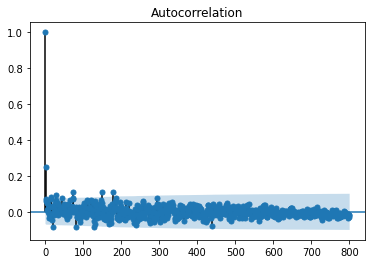

In [186]:
#in Q transform 86 samples per second
#lets consider 10 second shift 86*10
from statsmodels.graphics.tsaplots import plot_acf
print(signal)
plt.plot(signal[0:86*10])
plot_acf(signal[0:86*10], lags=800)
plt.show()